# Movie Reviews - Scikit Learn

*Esse notebook foi gerado a partir de exercícios da disciplina de Linguagem de Programação Aplicada do curso de Pós Graduação em Inteligência Artifical Aplicada da UFPR.*

Discente: Tiago José da Silva

Professor: Dr. Alexander Kutzke 

---

O exercício proposto consiste em criar uma pipeline de classificação de reviews de filmes como positivos e negativos.

Serão testados dois classificadores: MultinomialNB e BernoulliNB. Os parâmetros de ambos serão selecionados a partir da utilização do GridSearchCV.

Avaliaremos ambos os resultados na conclusão.

Os dados utilizados nesse exercício estão presentes em: https://github.com/progtiago/JupyterNotebooks/blob/master/UFPR-IAA/aplied-programing-language/files/movie_reviews.zip.

---

## 1. Separando os reviews entre treino e teste

Primeiramente, carrego os dados:

In [28]:
movie_reviews_data_folder = r"./files/movie_reviews/data"

In [29]:
from sklearn.datasets import load_files

dataset = load_files(movie_reviews_data_folder, shuffle=False)
print("n_samples: %d" % len(dataset.data))

n_samples: 2000


Separo 75% dos dados para treino e 25% para teste.

In [30]:
from sklearn.model_selection import train_test_split

docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.25, random_state=1)


---

## 2. Testando os classificadores

Imports necessários:

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np 

In [5]:
multinomial_clf = Pipeline([('vect', CountVectorizer()),
                            ('tfidf', TfidfTransformer()),
                            ('clf', MultinomialNB())])

In [6]:
bernoulli_clf = Pipeline([('vect', CountVectorizer()),
                          ('tfidf', TfidfTransformer()),
                          ('clf', BernoulliNB())])

### 2.1. Descobrindo um bom conjunto de parâmetros

Para ambos os classificadores busco o melhor conjunto de parâmetros a partir dos listados abaixo:

In [7]:
parameters = {'vect__ngram_range':[(1,1), (1,2), (2,2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1.0, 1e-2, 1e-3),
              'clf__fit_prior': (True, False)}

#### Melhor conjunto de parâmetros para o *multinomial_clf*

In [8]:
grid_search_clf = GridSearchCV(multinomial_clf, parameters, n_jobs = -1).fit(docs_train, y_train)

grid_search_predicted = grid_search_clf.predict(docs_test)

print(f'Best score for multinomial_clf: {grid_search_clf.best_score_}')
for param_name in sorted(parameters.keys()):
    print('%s: %r' %(param_name, grid_search_clf.best_params_[param_name]))

Best score for multinomial_clf: 0.8166666666666668
clf__alpha: 0.01
clf__fit_prior: True
tfidf__use_idf: False
vect__ngram_range: (2, 2)


#### Melhor conjunto de parâmetros para o *bernoulli_clf*

In [10]:
grid_search_clf = GridSearchCV(bernoulli_clf, parameters, n_jobs = -1).fit(docs_train, y_train)

grid_search_predicted = grid_search_clf.predict(docs_test)

print(f'Best score for bernoulli_clf: {grid_search_clf.best_score_}')
for param_name in sorted(parameters.keys()):
    print('%s: %r' %(param_name, grid_search_clf.best_params_[param_name]))

Best score for bernoulli_clf: 0.8026666666666665
clf__alpha: 0.01
clf__fit_prior: False
tfidf__use_idf: True
vect__ngram_range: (2, 2)


### 2.2. Classificando com o MultinomialNB

A partir do melhor conjunto de parâmetros, dentre os testados, recrio o classificador.

In [12]:
multinomial_clf = Pipeline([('vect', CountVectorizer(ngram_range = (2,2))),
                     ('tfidf', TfidfTransformer(use_idf = False)),
                     ('clf', MultinomialNB(alpha = 1e-2, fit_prior = True))])

In [13]:
multinomial_predicted = multinomial_clf.fit(docs_train, y_train).predict(docs_test)

#### Acurácia

In [15]:
np.mean(multinomial_predicted == y_test)

0.828

#### Report classification

In [16]:
print(metrics.classification_report(y_test, multinomial_predicted, target_names = dataset.target_names))

              precision    recall  f1-score   support

         neg       0.86      0.80      0.83       255
         pos       0.80      0.86      0.83       245

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



#### Matriz de confusão

In [17]:
multinomial_confusion_matrix = metrics.confusion_matrix(y_test, multinomial_predicted)

multinomial_confusion_matrix

array([[203,  52],
       [ 34, 211]])

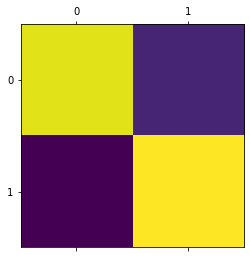

In [18]:
plt.matshow(multinomial_confusion_matrix)
plt.show()

### 2.3. Classificando com o BernoulliNB

A partir do melhor conjunto de parâmetros, dentre os testados, recrio o classificador.

In [21]:
bernoulli_clf = Pipeline([('vect', CountVectorizer(ngram_range = (2,2))),
                          ('tfidf', TfidfTransformer(use_idf = True)),
                          ('clf', BernoulliNB(alpha = 1e-2, fit_prior = False))])

In [22]:
bernoulli_predicted = bernoulli_clf.fit(docs_train, y_train).predict(docs_test)

#### Acurácia

In [23]:
np.mean(bernoulli_predicted == y_test)

0.842

#### Report classification

In [24]:
print(metrics.classification_report(y_test, bernoulli_predicted, target_names = dataset.target_names))

              precision    recall  f1-score   support

         neg       0.83      0.86      0.85       255
         pos       0.85      0.82      0.84       245

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



#### Matriz de confusão

In [25]:
bernoulli_confusion_matrix = metrics.confusion_matrix(y_test, bernoulli_predicted)

bernoulli_confusion_matrix

array([[220,  35],
       [ 44, 201]])

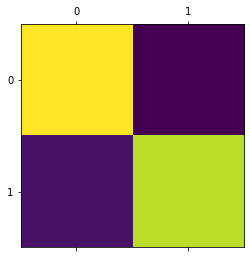

In [26]:
plt.matshow(bernoulli_confusion_matrix)
plt.show()

---

## 3. Conclusão

Ao analisar a precisão dos classificadores, percebemos que o MultinomialNB alcançou 86% de precisão na indentificação de reviews negativos contra 83% alcançados pelo BernoulliNB. Já o BernoulliNB alcançou 85% de precisão na indentificação de reviews positivos contra 80% alcançados pelo MultinomialNB.

No geral, ambos os classificadores testados, MultinomialNB e BernoulliNB, apresentaram resultados similares, visto suas matrizes de confusão, com uma leve vantagem para o BernoulliNB, que apresentou 84,2% de acurácia contra 82,8% do MultinomialNB.

Assim, para o problema proposto, sugiro escolher o classificador de melhor acurácia, o BernoulliNB.